<a href="https://colab.research.google.com/github/GarrettTChrisman/MA489_AY23-2/blob/main/Main_V5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AUTH

In [1]:
# Cloud authentication.
from google.colab import auth
auth.authenticate_user()

In [2]:
# Import, authenticate and initialize the Earth Engine library.
import ee
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=2iFNd7zQorpMQSpI0Tm5Oa0NzBp2ybiqBzMqRXl8HFU&tc=CuYO8pNowB6nW_uo2FQQTcpDSe3WWeThvfo4vsHTu7Y&cc=aqn8SfO-lSxMjsJhl5F-bDnJDa_H-Gke76REWPvqBGQ

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1Adeu5BVPioTHrlfv3b7oZh5RjtrkOtO2TGOXJZKoAjlsPJPGR2PYrnDcr08

Successfully saved authorization token.


In [3]:
# Folium setup.
import folium
print(folium.__version__)

0.14.0


Section 1: Import Libraries and Define Parameters

In [ ]:

# Specify inputs (Sentinel 1 and 2 bands) to the model and the response variable.
sentinel1Bands = ['VH']
sentinel2Bands = ['B2', 'B3', 'B4']
BANDS = sentinel1Bands + sentinel2Bands
RESPONSE = 'classification'
FEATURES = BANDS + [RESPONSE]

# Specify the size and shape of patches expected by the model.
KERNEL_SIZE = 256
KERNEL_SHAPE = [KERNEL_SIZE, KERNEL_SIZE]
#COLUMNS = [
#  tf.io.FixedLenFeature(shape=KERNEL_SHAPE, dtype=tf.float32) for k in FEATURES
#]
#FEATURES_DICT = dict(zip(FEATURES, COLUMNS))

# Sizes of the training and evaluation datasets.
#TRAIN_SIZE = 16000
#EVAL_SIZE = 8000

# Specify model training parameters.
#BATCH_SIZE = 16
#EPOCHS = 10
#BUFFER_SIZE = 2000
#OPTIMIZER = 'SGD'
LOSS = 'MeanSquaredError'
METRICS = ['RootMeanSquaredError']

### **Geometries**

In [4]:
import ee
import folium
from IPython.display import HTML

# Initialize the Earth Engine API
ee.Initialize()

# Define the study area
geometryEASTTROUBLESOME = ee.Geometry.Polygon(
        [[[-106.35995808802429, 40.09143624618937],
          [-106.21850911341491, 40.023113520094526],
          [-105.81338826380554, 40.06516638148247],
          [-105.56207600794616, 40.23731181025701],
          [-105.57855550013366, 40.405883599932544],
          [-106.14023152552429, 40.39019593755868],
          [-106.36270467005554, 40.27189808516265]
        ]])

geometryPINEGULCH = ee.Geometry.Polygon(
        [[[-108.80164742558028, 39.28402267340665],
          [-108.23722481815841, 39.29358857295844],
          [-108.23997140018966, 39.56831366828538],
          [-108.79752755253341, 39.553491364366145]
          ]])

geometryMIDDLEFORK = ee.Geometry.Polygon(
        [[[-106.512402002753, 40.753196918644164],
          [-106.8467983650577, 40.75371707019316],
          [-106.8474850105655, 40.55002765883959],
          [-106.5007290291202, 40.54481005789992],
          [-106.5172085213077, 40.73602963469819]
          ]])

geometryGRIZZLYCREEK = ee.Geometry.Polygon(
        [[[-107.40066503796388, 39.69746161256133],
          [-107.39860510144044, 39.46619798632684],
          [-106.90834020886231, 39.46778823854969],
          [-106.96670507702638, 39.74763415825682],
          [-107.40272497448731, 39.73337830588799]
          ]])

geometryCOWCREEK = ee.Geometry.Polygon(
        [[[-107.67201512780343, 38.07020015659054],
          [-107.38225072350656, 38.06749727823019],
          [-107.39049046960031, 38.26023166606401],
          [-107.680941519405, 38.25430068136088]
          ]])

geometrySPRINGCREEK = ee.Geometry.Polygon(
        [[[-105.34492099139318, 37.35379518510812],
          [-105.02082431170568, 37.351611883859434],
          [-105.0276907667838, 37.720773594857334],
          [-105.34354770037756, 37.71751469634035]]])

geometryCHERRYCANYON = ee.Geometry.Polygon(
        [[[-103.53011965523325, 37.51499254964799],
          [-103.53011965523325, 37.336135915833296],
          [-103.33785891304575, 37.33176822282621],
          [-103.33785891304575, 37.519349567331446]]]);

geometryCANADA1 = ee.Geometry.Polygon(
        [[[-76.2312925527167, 52.810839697020675],
          [-74.1768491933417, 52.774300675400134],
          [-74.1493833730292, 53.90897457593766],
          [-76.3191831777167, 53.91868101885405]]]);

geometryCANADA2 = ee.Geometry.MultiPolygon(
         [[[-90.05269175357823, 51.394720665085025],
           [-90.09663706607823, 50.41793874550113],
           [-87.12208872623448, 50.3881781335867],
           [-87.05067759342198, 51.36729269888467]]]);

geometryCANADA3 = ee.Geometry.Polygon(
        [[[-73.36699883406641, 51.58957661426429],
          [-73.02092949812891, 51.59554870878137],
          [-73.0074465691894, 51.977663589806255],
          [-73.3150637566894, 51.977663589806255]]]);

geometryCANADA4 = ee.Geometry.Polygon(
        [[[-76.55559006296006, 50.456116168895726],
          [-75.47892990671006, 50.48233885315647],
          [-75.46794357858506, 51.08145243900384],
          [-76.49516525827256, 51.07282441503781]]]);

geometryCANADA5 = ee.Geometry.Polygon(
        [[[-79.95844668636026, 48.862574819197626],
          [-79.327568412128, 48.864056658548776],
          [-79.31779800429307, 49.20124315131532],
          [-79.94346153114732, 49.208188074380985]]]);

geometryPASSFIRE = ee.Geometry.Polygon(
        [[[-108.56972086196336, 33.21108045055577],
          [-107.99843179946336, 33.21912290927452],
          [-107.98607218032274, 33.49098081288345],
          [-108.53950845961961, 33.489835518100946]]]);

geometryTHREELAKESFIRE = ee.Geometry.Polygon(
        [[[-112.15455141490042, 36.69028263631032],
          [-112.28364077036917, 36.69165913707209],
          [-112.28913393443167, 36.59937912151086],
          [-112.16588106577933, 36.59993037499069]]]);

geometries_dict = {
    'EastTroublesome': geometryEASTTROUBLESOME,
    'PineGulch': geometryPINEGULCH,
    'MiddleFork': geometryMIDDLEFORK,
    'GrizzlyCreek': geometryGRIZZLYCREEK,
#    'CowCreek': geometryCOWCREEK,
#   'SpringCreek': geometrySPRINGCREEK,
    'CherryCanyon': geometryCHERRYCANYON,
    'CANADA1': geometryCANADA1,
    'CANADA2' : geometryCANADA2,
    'CANADA3' : geometryCANADA3,
    'CANADA4' : geometryCANADA4,
    'CANADA5' : geometryCANADA5,
    'PASSFIRE' : geometryPASSFIRE,
    'THREELAKESFIRE' : geometryTHREELAKESFIRE}

geometries = [geometryCANADA5, geometryEASTTROUBLESOME, geometryPINEGULCH, geometryMIDDLEFORK, geometryGRIZZLYCREEK, geometryCOWCREEK, geometrySPRINGCREEK, geometryCHERRYCANYON, geometryCANADA1, geometryCANADA2, geometryCANADA3, geometryCANADA4, geometryPASSFIRE, geometryTHREELAKESFIRE]

# Set the start and end dates for the pre-fire and post-fire image collections
prefire_start = '2020-05-20'
prefire_end = '2020-06-18'
postfire_start = '2020-09-20'
postfire_end = '2020-10-28'

#eastTrouble Dates
prefire_start_EASTTROUBLESOME = '2020-08-10'
prefire_end_EASTTROUBLESOME = '2020-10-10'
postfire_start_EASTTROUBLESOME = '2020-10-15'
postfire_end_EASTTROUBLESOME = '2020-11-20'

# Pine Gulch dates
prefire_start_PINEGULCH = '2020-05-20'
prefire_end_PINEGULCH = '2020-06-18'
postfire_start_PINEGULCH = '2020-09-20'
postfire_end_PINEGULCH = '2020-10-28'

#Middle fork dates
prefire_start_MIDDLEFORK = '2020-05-20'
prefire_end_MIDDLEFORK = '2020-06-18'
postfire_start_MIDDLEFORK = '2020-11-20'
postfire_end_MIDDLEFORK = '2021-01-28'

#Cow Creek dates
prefire_start_COWCREEK = '2019-08-20'
prefire_end_COWCREEK = '2019-09-18'
postfire_start_COWCREEK = '2019-10-22'
postfire_end_COWCREEK = '2019-11-28'

#Crizzly Creek dates
prefire_start_GRIZZLYCREEK = '2020-05-20'
prefire_end_GRIZZLYCREEK = '2020-07-18'
postfire_start_GRIZZLYCREEK = '2020-09-06'
postfire_end_GRIZZLYCREEK = '2020-11-01'

#SpringCreek
prefire_start_SPRINGCREEK = '2018-05-05'
prefire_end_SPRINGCREEK = '2018-06-26'
postfire_start_SPRINGCREEK = '2018-09-15'
postfire_end_SPRINGCREEK = '2018-10-30'

#cheeryCanyon
prefire_start_CHERRYCANYON = '2020-04-20'
prefire_end_CHERRYCANYON  = '2020-05-15'
postfire_start_CHERRYCANYON  = '2020-07-01'
postfire_end_CHERRYCANYON  = '2020-08-15'

#Canada1
prefire_start_CANADA1 = '2023-05-01'
prefire_end_CANADA1  = '2023-06-01'
postfire_start_CANADA1  = '2023-07-04'
postfire_end_CANADA1 = '2023-07-06'

geometryCANADA1.getInfo()

{'type': 'Polygon',
 'coordinates': [[[-76.2312925527167, 52.810839697020675],
   [-74.1768491933417, 52.774300675400134],
   [-74.1493833730292, 53.90897457593766],
   [-76.3191831777167, 53.91868101885405],
   [-76.2312925527167, 52.810839697020675]]]}

In [5]:
def get_fire_boundary(event_id):
    dataset = ee.FeatureCollection('USFS/GTAC/MTBS/burned_area_boundaries/v1')
    filtered_dataset = dataset.filter(ee.Filter.eq('Event_ID', event_id))

    if filtered_dataset.size().getInfo() > 0:
        selected_fire = ee.Feature(filtered_dataset.first())
        fire_geometry = selected_fire.geometry()
        geometry_type = fire_geometry.type().getInfo()

        if geometry_type == 'Polygon':
            coordinates = fire_geometry.coordinates().getInfo()
            fire_polygon = ee.Geometry.Polygon(coordinates)
            return fire_polygon
        elif geometry_type == 'GeometryCollection':
            geometries = fire_geometry.geometries().getInfo()
            fire_multipolygon = ee.Geometry.MultiPolygon(geometries)
            return fire_multipolygon
        else:
            print(f"Unsupported geometry type: {geometry_type}")
            return None
    else:
        print(f"No features found with the specified Event_ID: {event_id}")
        return None


event_id_PineGulch = 'CO3933610852620200731'
event_id_EastTroublesome = 'CO4020310623920201014'
event_id_GrizzlyCreek = 'CO3957210726620200810'
event_id_MiddleFork = 'CO4062810679620200906'
event_id_CameronPeak = 'CO4060910587920200813'
event_id_SpringCreek = 'CO3749610529120180627'
event_id_CherryCanyon = 'CO3736710345020200520'

event_id_dict = {
    'PineGulch': 'CO3933610852620200731',
    'EastTroublesome': 'CO4020310623920201014',
    'GrizzlyCreek': 'CO3957210726620200810',
    'MiddleFork': 'CO4062810679620200906',
    'CherryCanyon':'CO3736710345020200520',
    #'SpringCreek': 'CO3749610529120180627'
    #'CameronPeak':'CO4060910587920200813'
}

events = [event_id_EastTroublesome, event_id_PineGulch, event_id_MiddleFork, event_id_GrizzlyCreek]

fire_boundaries = {}

#for fire_name, event_id in event_id_dict.items():
#    fire_boundary = get_fire_boundary(event_id)
#
#    if fire_boundary is not None:
#        fire_boundaries[fire_name] = fire_boundary
#        print(f"Added fire boundary for {fire_name} to the fire_boundaries dictionary:")
#        print(fire_boundaries[fire_name].getInfo())

for fire_name, polygon in geometries_dict.items():
    #fire_boundary = get_fire_boundary(polygon)

    if polygon is not None:
        fire_boundaries[fire_name] = polygon
        print(f"Added fire boundary for {fire_name} to the fire_boundaries dictionary:")
        print(fire_boundaries[fire_name].getInfo())

Added fire boundary for EastTroublesome to the fire_boundaries dictionary:
{'type': 'Polygon', 'coordinates': [[[-106.35995808802429, 40.09143624618937], [-106.21850911341491, 40.023113520094526], [-105.81338826380554, 40.06516638148247], [-105.56207600794616, 40.23731181025701], [-105.57855550013366, 40.405883599932544], [-106.14023152552429, 40.39019593755868], [-106.36270467005554, 40.27189808516265], [-106.35995808802429, 40.09143624618937]]]}
Added fire boundary for PineGulch to the fire_boundaries dictionary:
{'type': 'Polygon', 'coordinates': [[[-108.80164742558028, 39.28402267340665], [-108.23722481815841, 39.29358857295844], [-108.23997140018966, 39.56831366828538], [-108.79752755253341, 39.553491364366145], [-108.80164742558028, 39.28402267340665]]]}
Added fire boundary for MiddleFork to the fire_boundaries dictionary:
{'type': 'Polygon', 'coordinates': [[[-106.512402002753, 40.753196918644164], [-106.8467983650577, 40.75371707019316], [-106.8474850105655, 40.55002765883959],

Section 2: Define Functions, Load Images, and Create Maps

### **DATES**

In [28]:
fire_dates = {
    'EastTroublesome': {
        'prefire_start': '2020-08-10',
        'prefire_end': '2020-10-10',
        'postfire_start': '2020-10-15',
        'postfire_end': '2020-11-05'
    },
    'PineGulch': {
        'prefire_start': '2020-05-20',
        'prefire_end': '2020-06-18',
        'postfire_start': '2020-09-20',
        'postfire_end': '2020-10-28'
    },
    'MiddleFork': {
        'prefire_start': '2020-08-01',
        'prefire_end': '2020-10-11',
        'postfire_start': '2020-11-13',
        'postfire_end': '2020-11-30'
    },
    'GrizzlyCreek': {
        'prefire_start': '2020-05-20',
        'prefire_end': '2020-07-18',
        'postfire_start': '2020-09-06',
        'postfire_end': '2020-11-01'
    },

    'CherryCanyon':{
         'prefire_start': '2020-04-20',
        'prefire_end': '2020-05-15',
        'postfire_start': '2020-07-01',
        'postfire_end': '2020-08-15'
    },

    'CANADA1':{
        'prefire_start': '2022-06-01',
        'prefire_end': '2022-07-01',
        'postfire_start': '2023-06-15',
        'postfire_end': '2023-07-19'
    },

    'CANADA2':{
        'prefire_start': '2022-06-01',
        'prefire_end': '2022-07-11',
        'postfire_start': '2023-06-01',
        'postfire_end': '2023-07-18'
    },

    'CANADA3':{
        'prefire_start': '2022-06-11',
        'prefire_end': '2022-07-11',
        'postfire_start': '2023-06-20',
        'postfire_end': '2023-07-18'
    },

    'CANADA4':{
        'prefire_start': '2022-06-11',
        'prefire_end': '2022-07-11',
        'postfire_start': '2023-06-20',
        'postfire_end': '2023-07-19'
    },

    'CANADA5':{
        'prefire_start': '2022-06-11',
        'prefire_end': '2022-07-11',
        'postfire_start': '2023-06-05',
        'postfire_end': '2023-07-28'
    },

    'PASSFIRE':{
        'prefire_start': '2023-04-30',
        'prefire_end': '2023-05-30',
        'postfire_start': '2023-07-01',
        'postfire_end': '2023-07-18'
    },

    'THREELAKESFIRE':{
        'prefire_start': '2022-06-15',
        'prefire_end': '2022-07-30',
        'postfire_start': '2023-06-16',
        'postfire_end': '2023-07-18'
    }

}

### **Sentinel 2**

In [7]:
def maskS2sr(image):
    cloudBitMask = ee.Number(2).pow(10).int()
    cirrusBitMask = ee.Number(2).pow(11).int()
    qa = image.select('QA60')
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask).copyProperties(image, ["system:time_start"])

def create_rgb_image(image, geometry, viz_params={'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 3000}):
    """Creates RGB image from the given image and geometry."""
    return image.clip(geometry).visualize(**viz_params)


def calculate_dnbr_and_classification(prefire_start, prefire_end, postfire_start, postfire_end, geometry):
    #geometry1 = geometryEASTTROUBLESOME

    prefire_collection_S2 = (ee.ImageCollection('COPERNICUS/S2_SR').filterBounds(geometry).filterDate(prefire_start, prefire_end).map(maskS2sr).median())

    postfire_collection_S2 = (ee.ImageCollection('COPERNICUS/S2_SR').filterBounds(geometry).filterDate(postfire_start, postfire_end).map(maskS2sr).median())

    rgb_prefire_image = create_rgb_image(prefire_collection_S2, geometry)
    rgb_postfire_image = create_rgb_image(postfire_collection_S2, geometry)

    prefire_NBR_S2 = prefire_collection_S2.normalizedDifference(['B8', 'B12'])
    postfire_NBR_S2 = postfire_collection_S2.normalizedDifference(['B8', 'B12'])
    dNBR_unscaled_S2 = prefire_NBR_S2.subtract(postfire_NBR_S2)
    dNBR_S2 = dNBR_unscaled_S2.multiply(1000)

    thresholds_S2 = ee.Image([-1000, -251, -101, 99, 269, 439, 659, 2000])
    classified_S2 = dNBR_S2.lt(thresholds_S2).reduce('sum').toInt()

    return dNBR_S2, classified_S2, prefire_collection_S2, rgb_prefire_image, rgb_postfire_image


dnbr_layers = {}
classification_layers = {}
dnbr_and_classification_results = {}

#for fire_name, fire_boundary in fire_boundaries.items():
#    dates = fire_dates[fire_name]
#    prefire_start = dates["prefire_start"]
#    prefire_end = dates["prefire_end"]
#    postfire_start = dates["postfire_start"]
#    postfire_end = dates["postfire_end"]#
#
#    dnbr, classification, postfire_NBR_S2 = calculate_dnbr_and_classification(
#        prefire_start, prefire_end, postfire_start, postfire_end, fire_boundary
#    )#
#
#    dnbr_and_classification_results[fire_name] = {"dnbr": dnbr, "classification": classification, "NBR": postfire_NBR_S2}

for fire_name, polygon in geometries_dict.items():
    dates = fire_dates[fire_name]
    prefire_start = dates["prefire_start"]
    prefire_end = dates["prefire_end"]
    postfire_start = dates["postfire_start"]
    postfire_end = dates["postfire_end"]

    dnbr, classification, postfire_NBR_S2, rgb_prefire_image, rgb_postfire_image = calculate_dnbr_and_classification(
        prefire_start, prefire_end, postfire_start, postfire_end, polygon
    )

    dnbr_and_classification_results[fire_name] = {
        "dnbr": dnbr,
        "classification": classification,
        "NBR": postfire_NBR_S2,
        "rgb_prefire_image": rgb_prefire_image,
        "rgb_postfire_image": rgb_postfire_image
    }

# You can access the dNBR and classification results:
#print(dnbr_and_classification_results["SpringCreek"]["dnbr"].getInfo())
#print(dnbr_and_classification_results["SpringCreek"]["classification"].getInfo())

#prefire_collection_S2 = ee.ImageCollection('COPERNICUS/S2_SR').filterBounds(fire_boundaries['SpringCreek']).filterDate('2018-05-05', '2018-06-26').map(maskS2sr)
#postfire_collection_S2 = ee.ImageCollection('COPERNICUS/S2_SR').filterBounds(fire_boundaries['SpringCreek']).filterDate('2018-09-15', '2018-10-29').map(maskS2sr)

#print("Number of prefire images:", prefire_collection_S2.size().getInfo())
#print("Number of postfire images:", postfire_collection_S2.size().getInfo())#

In [10]:
sld_intervals = ('<RasterSymbolizer>' +
'<ColorMap type="intervals" extended="false" >' +
'<ColorMapEntry color="#ffffff" quantity="-500" label="-500"/>' +
'<ColorMapEntry color="#7a8737" quantity="-250" label="-250" />' +
'<ColorMapEntry color="#acbe4d" quantity="-100" label="-100" />' +
'<ColorMapEntry color="#0ae042" quantity="100" label="100" />' +
'<ColorMapEntry color="#fff70b" quantity="270" label="270" />' +
'<ColorMapEntry color="#ffaf38" quantity="440" label="440" />' +
'<ColorMapEntry color="#ff641b" quantity="660" label="660" />' +
'<ColorMapEntry color="#a41fd6" quantity="2000" label="2000" />' +
'</ColorMap>' +
'</RasterSymbolizer>')


fire_name_s2 = 'CANADA1'
dnbr_to_display = dnbr_and_classification_results[fire_name_s2]["dnbr"]
classification_to_display = dnbr_and_classification_results[fire_name_s2]["classification"]
nbr = dnbr_and_classification_results[fire_name_s2]["NBR"]

map_dNBR_S2 = folium.Map(location=[39.40, -108.5], zoom_start=4)
map_class_S2 = folium.Map(location=[39.40, -108.5], zoom_start=4)

folium.TileLayer(tiles=dnbr_to_display.getMapId()['tile_fetcher'].url_format, attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>', overlay=True, name='dNBR').add_to(map_dNBR_S2)
folium.TileLayer(tiles=dnbr_to_display.sldStyle(sld_intervals).getMapId()['tile_fetcher'].url_format, attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>', overlay=True, name='dNBR classified').add_to(map_class_S2)
#folium.TileLayer(tiles=nbr.getMapId()['tile_fetcher'].url_format, attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>', overlay=True, name='dNBR').add_to(map_dNBR_S2)

html_dNBR_S2 = map_dNBR_S2._repr_html_()
html_class_S2 = map_class_S2._repr_html_()

# Combine the HTML codes into a single string
html_combined_S2 = f'<table><tr><td>{html_dNBR_S2}</td><td>{html_class_S2}</td></tr></table>'

# Display the maps using the combined HTML
HTML(html_combined_S2)

Section 3: Display Maps and Create dNBR Classification Map

In [11]:
rgb_prefire_to_display = dnbr_and_classification_results[fire_name_s2]["rgb_prefire_image"]
rgb_postfire_to_display = dnbr_and_classification_results[fire_name_s2]["rgb_postfire_image"]

map_rgb_prefire = folium.Map(location=[39.40, -108.5], zoom_start=4)
map_rgb_postfire = folium.Map(location=[39.40, -108.5], zoom_start=4)

folium.TileLayer(
    tiles=rgb_prefire_to_display.getMapId()['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='Prefire RGB'
).add_to(map_rgb_prefire)

folium.TileLayer(
    tiles=rgb_postfire_to_display.getMapId()['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='Postfire RGB'
).add_to(map_rgb_postfire)

# Convert the maps to HTML.
html_rgb_prefire = map_rgb_prefire._repr_html_()
html_rgb_postfire = map_rgb_postfire._repr_html_()

# Combine the HTML codes into a single string
html_combined_RGB = f'<table><tr><td>{html_rgb_prefire}</td><td>{html_rgb_postfire}</td></tr></table>'

# Display the maps using the combined HTML
HTML(html_combined_RGB)

### **Export S2**

In [ ]:
#export S2 BW image
#fire_name = 'PineGulch'
dnbr_s2 = dnbr_and_classification_results[fire_name_s2]["dnbr"]
classification_s2 = dnbr_and_classification_results[fire_name_s2]["classification"]

image = dnbr_s2

# Set visualization parameters
viz_params = {
    'min': -1000,
    'max': 1000,
    'palette': ['white', 'black']
}

# Apply visualization parameters to the image
image = image.visualize(**viz_params)
output_path = f'S2_dNBR_{fire_name_s2}.tif'
scale = 20

    # Start the export task
task = ee.batch.Export.image.toDrive(
        image=image,
        description=f'Export GeoTIFF for {fire_name_s2}',
        folder='Cleaned_Fire_images_TIFF',
        fileNamePrefix=output_path[:-4],
        region = geometryPINEGULCH,
        #region=fire_boundaries[fire_name_s2],
        scale=scale,
        crs='EPSG:4326'
    )

task.start()
print(f"S2 Export task started for {fire_name_s2}")

S2 Export task started for CANADA4


In [ ]:
#export S2 class image
# Apply the color ramp to the classified image
#classified_S2 = dNBR_S2.lt(thresholds_S2).reduce('sum').toInt()
#fire_name = 'PineGulch'
classification_s1 = dnbr_and_classification_results[fire_name_s2]["classification"]
image = dnbr_and_classification_results[fire_name_s2]["dnbr"].sldStyle(sld_intervals)

output_path =  f'S2_classification_{fire_name_s2}.tif'

# Define the spatial resolution (in meters) for the output file
scale = 20

# Define the region of interest for the output file (as a GeoJSON object
# Export the image to GeoTIFF format
task = ee.batch.Export.image.toDrive(
    image=image,
    description=f'Export GeoTIFF for {fire_name_s2} classification',
    folder='Cleaned_Fire_images_TIFF',
    fileNamePrefix=output_path[:-4],
    #region = geometryCHERRYCANYON,
    #region=fire_boundaries[fire_name_s2],
    scale=scale,
    crs='EPSG:4326'
)

task.start()
print(f"Export task started for {fire_name_s2}")

KeyboardInterrupt: ignored

### **Sentinel 1**


Section 1: Filter and create prefire and postfire collections for S1 data

Section 2: Create map layers and add to map


In [15]:
#def create_S1_collection(start_date, end_date, orbit_pass, geometry):
#    collection = ee.ImageCollection('COPERNICUS/S1_GRD_FLOAT') \
#        .filterBounds(geometry) \
#        .filterDate(start_date, end_date) \
#        .filter(ee.Filter.listContains("system:band_names", "VH"))
#
#    return collection

def calculate_dnbr_and_classification_s1(prefire_start, prefire_end, postfire_start, postfire_end, geometry):
    #geometry = geometryCHERRYCANYON

    prefire_asc = create_S1_collection(prefire_start, prefire_end, 'ASCENDING', geometry)
    prefire_desc = create_S1_collection(prefire_start, prefire_end, 'DESCENDING', geometry)
    postfire_asc = create_S1_collection(postfire_start, postfire_end, 'ASCENDING', geometry)
    postfire_desc = create_S1_collection(postfire_start, postfire_end, 'DESCENDING', geometry)

    ################
    print('prefire_asc size: ', prefire_asc.size().getInfo())
    print('prefire_desc size: ', prefire_desc.size().getInfo())
    print('postfire_asc size: ', postfire_asc.size().getInfo())
    print('postfire_desc size: ', postfire_desc.size().getInfo())
    ################


    vh_prefire_asc = prefire_asc.select(['VH']).median().clip(geometry)
    vh_prefire_desc = prefire_desc.select(['VH']).median().clip(geometry)
    vh_postfire_asc = postfire_asc.select(['VH']).median().clip(geometry)
    vh_postfire_desc = postfire_desc.select(['VH']).median().clip(geometry)

    vh_prefire_combined = vh_prefire_asc.add(vh_prefire_desc).multiply(1)
    vh_postfire_combined = vh_postfire_asc.add(vh_postfire_desc).multiply(1)

    dNBR_unscaled_S1 = vh_prefire_combined.subtract(vh_postfire_combined)
    dNBR_S1 = dNBR_unscaled_S1.multiply(1.00)

    # Apply a smoothing function to fill gaps in the dNBR image
    kernel = ee.Kernel.square(radius=1.5, units='pixels')
    dNBR_S1_smoothed = dNBR_S1.focal_mean(kernel=kernel)

    no_data_mask = dNBR_S1_smoothed.mask().eq(0)

    dNBR_S1_smoothed = dNBR_S1_smoothed.updateMask(no_data_mask.Not()).add(no_data_mask.multiply(0))

    thresholds = ee.Image([-1, -0.025, -0.0125, -0.005, 0.005, 0.0135, 0.027, 0.045, 0.1, 1])
    classified_S1 = dNBR_S1_smoothed.lt(thresholds).reduce('sum').toInt()

    return dNBR_S1_smoothed, classified_S1


def create_S1_collection(start_date, end_date, orbit_pass, geometry):
    print('Start date: ', start_date)
    print('End date: ', end_date)
    collection = ee.ImageCollection('COPERNICUS/S1_GRD_FLOAT') \
        .filterBounds(geometry) \
        .filterDate(start_date, end_date) \
        .filter(ee.Filter.eq('orbitProperties_pass', orbit_pass)) \
        .filter(ee.Filter.eq('instrumentMode', 'IW')) # Add this line
    #print('Collection size: ', collection.size().getInfo())

    return collection

In [16]:
def calculate_dnbr_and_classification_s1(prefire_start, prefire_end, postfire_start, postfire_end, geometry):
    #geometry = geometryCHERRYCANYON

    prefire = create_S1_collection(prefire_start, prefire_end, geometry)
    #postfire = get_most_recent_image(postfire_start, postfire_end, geometry)
    postfire = create_S1_collection(postfire_start, postfire_end, geometry)

    print('prefire size: ', prefire.size().getInfo())
    print('postfire size: ', postfire.size().getInfo())
    #print('postfire info: ', postfire.getInfo())

    vh_prefire = prefire.select(['VH']).median().clip(geometry)
    vh_postfire = postfire.select(['VH']).median().clip(geometry)
    #vh_postfire = postfire.select(['VH']).clip(geometry)

    dNBR_unscaled_S1 = vh_prefire.divide(vh_postfire)
    dNBR_S1 = dNBR_unscaled_S1.multiply(1.0)

    # Apply a smoothing function to fill gaps in the dNBR image
    kernel = ee.Kernel.square(radius= 0.5, units='pixels')
    dNBR_S1_smoothed = dNBR_S1.focal_mean(kernel=kernel)

    no_data_mask = dNBR_S1_smoothed.mask().eq(0)

    dNBR_S1_smoothed = dNBR_S1_smoothed.updateMask(no_data_mask.Not()).add(no_data_mask.multiply(0))

    thresholds = ee.Image([-1, -0.025, -0.0125, -0.005, 0.005, 0.0135, 0.027, 0.045, 0.1, 1])
    classified_S1 = dNBR_S1_smoothed.lt(thresholds).reduce('sum').toInt()

    return dNBR_S1_smoothed, classified_S1, vh_prefire, vh_postfire


In [ ]:
def calculate_dnbr_and_classification_s1(prefire_start, prefire_end, postfire_start, postfire_end, geometry):

    prefire = create_S1_collection(prefire_start, prefire_end, geometry)
    #postfire = get_most_recent_image(postfire_start, postfire_end, geometry)
    postfire = create_S1_collection_post(postfire_start, postfire_end, geometry)

    print('prefire size: ', prefire.size().getInfo())
    #print('postfire info: ', postfire.getInfo())
    print('postfire info: ')

    vh_prefire = prefire.select(['VH']).median().clip(geometry)
    vh_postfire = postfire.select(['VH']).clip(geometry)

    dNBR_unscaled_S1 = vh_prefire.divide(vh_postfire)
    dNBR_S1 = dNBR_unscaled_S1.multiply(1.0)

    #despeckling function to remove salt and pepper noise
    speckle_kernel = ee.Kernel.square(3)
    vh_prefire_despeckled = vh_prefire.reduceNeighborhood(
        reducer=ee.Reducer.mean(),
        kernel=speckle_kernel,
    )
    vh_postfire_despeckled = vh_postfire.reduceNeighborhood(
        reducer=ee.Reducer.mean(),
        kernel=speckle_kernel,
    )

    dNBR_S1_despeckled = vh_prefire_despeckled.subtract(vh_postfire_despeckled)

    # Apply a smoothing function to fill gaps in the dNBR image
    smooth_kernel = ee.Kernel.square(radius=0.5, units='pixels')
    dNBR_S1_smoothed = dNBR_S1_despeckled.focal_mean(kernel=smooth_kernel)

    no_data_mask = dNBR_S1_smoothed.mask().eq(0)

    dNBR_S1_smoothed = dNBR_S1_smoothed.updateMask(no_data_mask.Not()).add(no_data_mask.multiply(0))

    thresholds = ee.Image([-1, -0.025, -0.0125, -0.005, 0.005, 0.0135, 0.027, 0.045, 0.1, 1])
    classified_S1 = dNBR_S1_smoothed.lt(thresholds).reduce('sum').toInt()

    return dNBR_S1_smoothed, classified_S1, vh_prefire_despeckled, vh_postfire_despeckled


In [17]:
def create_S1_collection(start_date, end_date, geometry):
    print('Start date: ', start_date)
    print('End date: ', end_date)
    collection = ee.ImageCollection('COPERNICUS/S1_GRD_FLOAT') \
        .filterBounds(geometry) \
        .filterDate(start_date, end_date) \
        .filter(ee.Filter.eq('instrumentMode', 'IW')) # Add this line
    #print('Collection size: ', collection.size().getInfo())

    return collection


In [ ]:
def create_S1_collection(start_date, end_date, geometry):
    print('Start date: ', start_date)
    print('End date: ', end_date)
    collection = ee.ImageCollection('COPERNICUS/S1_GRD_FLOAT') \
        .filterBounds(geometry) \
        .filterDate(start_date, end_date) \
        .filter(ee.Filter.eq('instrumentMode', 'IW'))

    image_list = collection.toList(collection.size())

    for i in range(collection.size().getInfo()):
        image = ee.Image(image_list.get(i))
        print('Image ID: ', image.id().getInfo())

    return collection

In [ ]:
def get_most_recent_image(start_date, end_date, geometry):
    print('Start date: ', start_date)
    print('End date: ', end_date)
    collection = ee.ImageCollection('COPERNICUS/S1_GRD_FLOAT') \
        .filterBounds(geometry) \
        .filterDate(start_date, end_date) \
        .filter(ee.Filter.eq('instrumentMode', 'IW')) \
        .sort('system:time_start', False) # Sort in descending order

    most_recent_image = ee.Image(collection.first())
    image_date = ee.Date(most_recent_image.get('system:time_start')).format('YYYY-MM-dd').getInfo()
    print('Most recent image date: ', image_date)
    return most_recent_image

## This is testing time series **data**

In [ ]:

def create_S1_collection(start_date, end_date, geometry):
    print('Start date: ', start_date)
    print('End date: ', end_date)
    collection = ee.ImageCollection('COPERNICUS/S1_GRD') \
        .filterBounds(geometry) \
        .filterDate(start_date, end_date) \
        .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')) \
        .filter(ee.Filter.eq('instrumentMode', 'IW'))
    return collection

def calculate_dnbr_and_classification_s1_for_dates(prefire_start, prefire_end, postfire_dates, geometry):
    prefire = create_S1_collection(prefire_start, prefire_end, geometry).median()

    images_list = []
    for postfire_date in postfire_dates:
        postfire = create_S1_collection(postfire_date, postfire_date, geometry).median()
        dnbr_s1 = prefire.subtract(postfire)
        images_list.append({"image": dnbr_s1, "description": f"dnbr_s1_{postfire_date}"})
    return images_list

# Define your parameters
geometry = ee.Geometry.Polygon(geometries_dict["PineGulch"])
prefire_start_PINEGULCH = '2020-05-20'
prefire_end_PINEGULCH = '2020-06-18'
postfire_dates_PINEGULCH = ["2020-06-20", "2020-06-25", "2020-06-30", "2020-07-05", "2020-07-10", "2020-07-15", "2020-07-20", "2020-07-25", "2020-07-30", "2020-08-04", "2020-08-09", "2020-08-14", "2020-08-19", "2020-08-24", "2020-08-28"]

# Calculate differences and save images
time_series_images = calculate_dnbr_and_classification_s1_for_dates(prefire_start_PINEGULCH, prefire_end_PINEGULCH, postfire_dates_PINEGULCH, geometry)

time_series_images

In [13]:
def save_images_to_drive(image_list, folder):
    # Check if image_list is not empty
    if image_list:
        # Get the first image dictionary from the list
        image_dict = image_list[0]
        task = ee.batch.Export.image.toDrive(**{
            'image': image_dict['image'],
            'description': image_dict['description'],
            'folder': folder,
            'scale': 30,
            'region': geometryPINEGULCH
        })
        task.start()
    else:
        print("No images in the list.")

save_images_to_drive(time_series_images, '/content/drive/MyDrive/Cleaned_Fire_images_TIFF')



EEException: ignored

### **END of Time Series Data**

In [29]:
dnbr_s1_layers = {}
classification_s1_layers = {}
dnbr_and_classification_s1_results = {}

#for fire_name, fire_boundary in fire_boundaries.items():
#    dates = fire_dates[fire_name]
#    prefire_start = dates["prefire_start"]
#    prefire_end = dates["prefire_end"]
#    postfire_start = dates["postfire_start"]
#    postfire_end = dates["postfire_end"]
#
#    dnbr_s1, classification_s1 = calculate_dnbr_and_classification_s1(
#        prefire_start, prefire_end, postfire_start, postfire_end, fire_boundary
#    )
#
#    dnbr_and_classification_s1_results[fire_name] = {"dnbr_s1": dnbr_s1, "classification_s1": classification_s1}

dnbr_and_classification_s1_results = {}
vh_prefire_results = {}
vh_postfire_results = {}

for fire_name, polygon in geometries_dict.items():

    print('Fire name: ', fire_name)
    print('Polygon coordinates: ', polygon.getInfo())

    dates = fire_dates[fire_name]
    prefire_start = dates["prefire_start"]
    prefire_end = dates["prefire_end"]
    postfire_start = dates["postfire_start"]
    postfire_end = dates["postfire_end"]

    dnbr_s1, classification_s1, vh_prefire, vh_postfire = calculate_dnbr_and_classification_s1(
        prefire_start, prefire_end, postfire_start, postfire_end, polygon
    )

    dnbr_and_classification_s1_results[fire_name] = {"dnbr_s1": dnbr_s1, "classification_s1": classification_s1}
    vh_prefire_results[fire_name] = vh_prefire
    vh_postfire_results[fire_name] = vh_postfire
    print(dnbr_and_classification_s1_results[fire_name]["dnbr_s1"].getInfo())


Fire name:  EastTroublesome
Polygon coordinates:  {'type': 'Polygon', 'coordinates': [[[-106.35995808802429, 40.09143624618937], [-106.21850911341491, 40.023113520094526], [-105.81338826380554, 40.06516638148247], [-105.56207600794616, 40.23731181025701], [-105.57855550013366, 40.405883599932544], [-106.14023152552429, 40.39019593755868], [-106.36270467005554, 40.27189808516265], [-106.35995808802429, 40.09143624618937]]]}
Start date:  2020-08-10
End date:  2020-10-10
Start date:  2020-10-15
End date:  2020-11-05
prefire size:  31
postfire size:  7
{'type': 'Image', 'bands': [{'id': 'VH', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'dimensions': [2, 2], 'origin': [-107, 39], 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}]}
Fire name:  PineGulch
Polygon coordinates:  {'type': 'Polygon', 'coordinates': [[[-108.80164742558028, 39.28402267340665], [-108.23722481815841, 39.29358857295844], [-108.23997140018966, 39.56831366828538], [-108.79752755253341, 39.55349136436

In [32]:
def create_S1_collection(start_date, end_date, geometry):
    print('Start date: ', start_date)
    print('End date: ', end_date)
    collection = ee.ImageCollection('COPERNICUS/S1_GRD_FLOAT') \
        .filterBounds(geometry) \
        .filterDate(start_date, end_date) \
        .filter(ee.Filter.eq('instrumentMode', 'IW')) # Add this line
    #print('Collection size: ', collection.size().getInfo())

    return collection

def create_MODIS_collection(start_date, end_date, geometry):
    print('Start date: ', start_date)
    print('End date: ', end_date)
    collection = ee.ImageCollection('MODIS/061/MOD14A1') \
        .filterBounds(geometry) \
        .filterDate(start_date, end_date)

    return collection


def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

fire_name = "CherryCanyon"

poly =  geometries_dict[fire_name]
dates = fire_dates[fire_name]
prefire_start = dates["prefire_start"]
prefire_end = dates["prefire_end"]
postfire_start = dates["postfire_start"]
postfire_end = dates["postfire_end"]

PG_image1_pre = create_S1_collection(prefire_start, prefire_end, poly)
PG_image1_post = create_S1_collection(postfire_start, postfire_end, poly)

import time
acq_times_pre = PG_image1_pre.aggregate_array('system:time_start').getInfo()
acq_times_post = PG_image1_post.aggregate_array('system:time_start').getInfo()

time_list_pre = [time.strftime('%x', time.gmtime(acq_time/1000)) for acq_time in acq_times_pre]
time_list_post = [time.strftime('%x', time.gmtime(acq_time/1000)) for acq_time in acq_times_post]

print(time_list_pre)
print(time_list_post)

im_list_pre = PG_image1_pre.toList(PG_image1_pre.size())
im_list_post = PG_image1_post.toList(PG_image1_post.size())
list_length_post = im_list_post.size().getInfo()

im_pre = ee.Image(PG_image1_pre.median()).select('VH').clip(poly)
#im_post = ee.Image(im_list_post.get(list_length_post - 3)).select('VH').clip(poly)
im_post = ee.Image(PG_image1_post.median()).select('VH').clip(poly)

ratio = im_pre.divide(im_post)
sub = im_pre.subtract(im_post)

thresholds = ee.Image([-1, -0.025, -0.0125, -0.005, 0.005, 0.0135, 0.027, 0.045, 0.1, 1])
classified = ratio.lt(thresholds).reduce('sum').toInt()

MODIS_image_post = create_MODIS_collection(postfire_start, postfire_end, poly)
fireMaskVis = {
  'min': 0.0,
  'max': 6000.0,
  'bands': ['MaxFRP', 'FireMask', 'FireMask'],
}

mp = folium.Map(location= [39.40, -108.5], zoom_start=1)

mp.add_ee_layer(im_pre,
                {'min': -0.05, 'max': 0.05, 'palette': ['black','white']}, 'pre')

mp.add_ee_layer(im_post,
                {'min': -0.05, 'max': 0.05, 'palette': ['black','white']}, 'post')

mp.add_ee_layer(ratio,
                {'min': .85, 'max': 4.5, 'palette': ['white', 'black', 'red']}, 'Ratio')

mp.add_ee_layer(sub,
                {'min': 0, 'max': 0.015, 'palette': ['white', 'black', 'red']}, 'sub')
#['blue', 'white', 'red'] as the palette, where blue represents decrease, white represents no change, and red represents increase.

mp.add_ee_layer(classified, {'min': -0.05, 'max': 0.05, 'palette': ['black', 'white']}, 'Classification')
mp.add_ee_layer(MODIS_image_post.median(), fireMaskVis, 'MODIS postfire')


mp.add_child(folium.LayerControl())

display(mp)

Start date:  2020-04-20
End date:  2020-05-15
Start date:  2020-07-01
End date:  2020-08-15
['04/23/20', '04/30/20', '05/05/20', '05/12/20', '04/24/20', '05/06/20']
['07/04/20', '07/11/20', '07/16/20', '07/23/20', '07/28/20', '08/04/20', '08/09/20', '07/05/20', '07/17/20', '07/29/20', '08/10/20']
Start date:  2020-07-01
End date:  2020-08-15


In [33]:
list_length_post = im_list_post.size().getInfo()
mp2 = folium.Map(location= [39.40, -108.5], zoom_start=1)


for i in range(list_length_post):
    #image from the collection
    im_post = ee.Image(im_list_post.get(i)).select('VH').clip(poly)


    mp2.add_ee_layer(im_post,
                    {'min': -0.05, 'max': 0.05, 'palette': ['black', 'white']},
                    'Post fire image {}'.format(i+1))


mp2.add_child(folium.LayerControl())

display(mp2)

In [ ]:
image = sub

# Set visualization parameters
viz_params = {
        'min': 0.0,
        'max': 0.015,
        'palette': ['white', 'black']
    }

# Export settings
image = image.visualize(**viz_params)
output_path = f'S1_sub_{fire_name}_box.tif' # Update file name to indicate 'sub' layer
scale = 10

# Start the export task
task = ee.batch.Export.image.toDrive(
        image=image,
        description=f'Export GeoTIFF for {fire_name}',
        folder='Cleaned_Fire_images_TIFF',
        fileNamePrefix=output_path[:-4],
        region=fire_boundaries[fire_name],
        scale=scale,
        crs='EPSG:4326'
    )

task.start()
print(f"Export task started for {fire_name}")

Export task started for CANADA1


In [34]:
FN = "PASSFIRE"
print(dnbr_and_classification_s1_results[FN]["dnbr_s1"].getInfo())
print(dnbr_and_classification_s1_results[FN]["classification_s1"].getInfo())

{'type': 'Image', 'bands': [{'id': 'VH', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'dimensions': [3, 2], 'origin': [-110, 32], 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}]}
{'type': 'Image', 'bands': [{'id': 'sum', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -2147483648, 'max': 2147483647}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}]}


In [27]:
# Create functions to generate TileLayer
sld_intervals_S1 = ('<RasterSymbolizer>' +
'<ColorMap type="intervals" extended="false" >' +
#'<ColorMapEntry color="#a41fd6" quantity="-1" label="-1" />' +
'<ColorMapEntry color="#7a8737" quantity="-0.025" label="-0.025"/>' +
'<ColorMapEntry color="#7a8737" quantity="-0.0125" label="-0.0125" />' +
'<ColorMapEntry color="#acbe4d" quantity="-0.005" label="-0.005" />' +
'<ColorMapEntry color="#0ae042" quantity="0.005" label="0.005" />' +
'<ColorMapEntry color="#fff70b" quantity="0.0135" label="0.0135" />' +
'<ColorMapEntry color="#ffaf38" quantity="0.027" label="0.027" />' +
'<ColorMapEntry color="#ff641b" quantity="0.045" label="0.045" />' +
'<ColorMapEntry color="#a41fd6" quantity="0.1" label="0.1" />' +
'<ColorMapEntry color="#a41fd6" quantity="1" label="1" />' +
'</ColorMap>' +
'</RasterSymbolizer>')


from IPython.display import HTML

def create_tile_layer(image, min_value, max_value, palette, name):
    map_id = image.getMapId({'min': min_value, 'max': max_value, 'palette': palette})
    tile_layer = folium.TileLayer(
        tiles=map_id['tile_fetcher'].url_format,
        attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
        overlay=True,
        name=name,
        control = True
    )
    return tile_layer

def create_map_with_layer(image, min_value, max_value, palette, name):
    map_center = [39.40, -108.5]
    map_obj = folium.Map(location=map_center, zoom_start=4)

    tile_layer = create_tile_layer(image, min_value, max_value, palette, name)
    tile_layer.add_to(map_obj)
    return map_obj

fire_name_s1 = 'THREELAKESFIRE'
dnbr_s1 = dnbr_and_classification_s1_results[fire_name_s1]["dnbr_s1"]
classification_s1 = dnbr_and_classification_s1_results[fire_name_s1]["classification_s1"]


# Set the map center and zoom level
map_center = [39.40, -108.5]
zoom_level = 4

# Create maps with layers using the functions
map_pre_S1 = create_map_with_layer(vh_prefire_results[fire_name_s1], -0.05, 0.05, ['black','white'], 'Pre-fire S1 VH')
map_post_S1 = create_map_with_layer(vh_postfire_results[fire_name_s1], -0.05, 0.05, ['black','white'], 'Post-fire S1 VH')

map_dNBR_S1 = create_map_with_layer(dnbr_s1, -0.05, 0.05, ['white', 'black'], 'dNBR S1')

map_class_S1 = folium.Map(location=[39.40, -108.5], zoom_start=4)
folium.TileLayer(tiles=dnbr_s1.sldStyle(sld_intervals_S1).getMapId()['tile_fetcher'].url_format, attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>', overlay=True, name='dNBR classified').add_to(map_class_S1)
#map_class_S1 = create_map_with_layer(classification_s1, 0.05, 0.05, , 'dNBR Classified S1')

# Get the HTML representation for each map
html_pre_S1 = map_pre_S1._repr_html_()
html_post_S1 = map_post_S1._repr_html_()
html_dNBR_S1 = map_dNBR_S1._repr_html_()
html_class_S1 = map_class_S1._repr_html_()

# Combine the HTML codes into a single string
html_combined_S1 = f'<table><tr><td>{html_pre_S1}</td><td>{html_post_S1}</td><td>{html_dNBR_S1}</td><td>{html_class_S1}</td></tr></table>'
#html_combined_S1 = f'<table><tr><td>{html_dNBR_S1}</td><td>{html_class_S1}</td></tr></table>'

# Display the maps using the combined HTML
HTML(html_combined_S1)

Displaying post-fire images for CANADA3


EEException: ignored

Section 3: Ascending and descending map

### **Exporting** S1


In [ ]:
fire_name = 'CANADA3'
dnbr_s1 = dnbr_and_classification_s1_results[fire_name_s1]["dnbr_s1"]
classification_s1 = dnbr_and_classification_s1_results[fire_name_s1]["classification_s1"]

image = dnbr_s1

# Set visualization parameters
viz_params = {
        'min': -0.05,
        'max': 0.05,
        'palette': ['white', 'black']
    }

    # Export settings
image = image.visualize(**viz_params)
output_path = f'S1_dNBR_{fire_name_s1}_box.tif'
scale = 10

    # Start the export task
task = ee.batch.Export.image.toDrive(
        image=image,
        description=f'Export GeoTIFF for {fire_name_s1}',
        folder='Cleaned_Fire_images_TIFF',
        fileNamePrefix=output_path[:-4],
        region=fire_boundaries[fire_name_s1],
        #region= geometryCHERRYCANYON,
        scale=scale,
        crs='EPSG:4326'
    )

task.start()
print(f"Export task started for {fire_name_s1}")

Export task started for CANADA3


In [ ]:
#Exporting to Geo TIFF files
#test S1 classification file
#fire_name = 'PineGulch'
classification_s1 = dnbr_and_classification_s1_results[fire_name_s1]["classification_s1"]


image = dnbr_and_classification_s1_results[fire_name_s1]["dnbr_s1"].sldStyle(sld_intervals_S1)

output_path =  f'S1_classification_{fire_name_s1}_box.tif'

# Define the spatial resolution (in meters) for the output file
scale = 10

# Export the image to GeoTIFF format
task = ee.batch.Export.image.toDrive(
    image=image,
    description=f'Export GeoTIFF for {fire_name_s1} classification',
    folder='Cleaned_Fire_images_TIFF',
    fileNamePrefix=output_path[:-4],
    #region=fire_boundaries[fire_name_s1],
    region=geometryEASTTROUBLESOME,
    scale=scale,
    crs='EPSG:4326'
)

task.start()
print(f"Export task started for {fire_name_s1}")

Export task started for EastTroublesome


### **READ and SPLIT IMAGE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

#pip install tensorflow
#!pip install gdal
#!pip install osgeo
import os
from osgeo import gdal
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Step 1: Read dNBR TIFF image from Google Drive into an array format
def read_geotiff(file_path):
    dataset = gdal.Open(file_path, gdal.GA_ReadOnly)
    band = dataset.GetRasterBand(1)
    data = band.ReadAsArray()
    return data

def preprocess_image(image):
    #return (image - np.min(image)) / (np.max(image) - np.min(image))
    return image

def classify_image(image, threshold):
    return (image > threshold).astype(np.uint8)

google_drive_path = "/content/drive/MyDrive/Cleaned_Fire_images_TIFF"
os.chdir(google_drive_path)

#print(os.listdir())


fire_name_class= 'PineGulch'
#fire_name_class= 'EastTroublesome'

dnbr_image_s1 = read_geotiff(f'S1/BOX/S1_classification_{fire_name_class}_box.tif')
dnbr_image_s2 = read_geotiff(f'S2/S2_classification_{fire_name_class}.tif')
#preprocessed_dnbr_image = preprocess_image(dnbr_image)

#preprocessed_dnbr_image.shape

threshold_s1 = 85 #figure out these thresholds
threshold_s2 = 95

classified_image_s1 = classify_image(dnbr_image_s1, threshold_s1)
classified_image_s2 = classify_image(dnbr_image_s2, threshold_s2)

cmap = mcolors.ListedColormap(['white','black'])
#plt.imsave(f'S1_classification_{fire_name_class}_color_box.jpg', classified_image_s1, cmap=cmap)
#plt.imsave(f'S2_classification_{fire_name_class}_color_box.jpg', classified_image_s2, cmap=cmap)

In [ ]:
from sklearn.model_selection import train_test_split


def split_image_into_patches(image, patch_size, overlap_factor=2):
    height, width = image.shape
    patches = []
    stride = patch_size // overlap_factor
    for i in range(0, height - patch_size + 1, stride):
        for j in range(0, width - patch_size + 1, stride):
            patch = image[i:i+patch_size, j:j+patch_size]
            patches.append(patch)
    return np.array(patches)



### RESIZE & **NORMALIZE**

In [36]:
#resize

from osgeo import gdal, gdalconst
import os

def resize_image(src_filename, match_filename, dst_filename):
    # Source
    src = gdal.Open(src_filename, gdalconst.GA_ReadOnly)
    src_proj = src.GetProjection()

    # Match
    match_ds = gdal.Open(match_filename, gdalconst.GA_ReadOnly)
    gdal.UseExceptions()
    match_proj = match_ds.GetProjection()
    match_geotrans = match_ds.GetGeoTransform()
    wide = match_ds.RasterXSize
    high = match_ds.RasterYSize

    # Destination
    dst = gdal.GetDriverByName('GTiff').Create(dst_filename, wide, high, 3, gdalconst.GDT_Float32)
    dst.SetGeoTransform(match_geotrans)
    dst.SetProjection(match_proj)

    # Reproject
    gdal.ReprojectImage(src, dst, src_proj, match_proj, gdalconst.GRA_Bilinear)

    # Flush
    del dst


#def normalize_image(src_filename, dst_filename, s1_range=(-0.05, 0.05), s2_range=(-1000, 1000), dst_range=(0, 100)):
#@    # Source
 #   src = gdal.Open(src_filename, gdalconst.GA_ReadOnly)
 #   src_proj = src.GetProjection()

    # Normalize the source data and save it to the destination file
#    gdal.Translate(dst_filename, src, scaleParams=[[s2_range[0], s2_range[1], s1_range[0], s1_range[1]]], outputType=gdalconst.GDT_Float32)

    # Flush
#    del src

def normalize_image(src_filename, dst_filename, src_range, dst_range=(0, 100)):
    # Source
    src = gdal.Open(src_filename, gdalconst.GA_ReadOnly)

    # Normalize the source data and save it to the destination file
    gdal.Translate(dst_filename, src, scaleParams=[[src_range[0], src_range[1], dst_range[0], dst_range[1]]], outputType=gdalconst.GDT_Float32)

    # Flush
    del src

In [37]:
google_drive_path = "/content/drive/MyDrive/Cleaned_Fire_images_TIFF"
os.chdir(google_drive_path)

s1_range = (-0.05, 0.05)
s2_range = (-1000, 1000)
dst_range = (0, 100)

f = ['PineGulch','GrizzlyCreek','CherryCanyon']
fire = f[0]

src_filename = f"/content/drive/MyDrive/Cleaned_Fire_images_TIFF/S2/S2_dNBR_{fire}.tif"
match_filename = f"/content/drive/MyDrive/Cleaned_Fire_images_TIFF/S1/BOX/S1_dNBR_{fire}_box.tif"
dst_filename = f"/content/drive/MyDrive/Cleaned_Fire_images_TIFF/S2/Resized_S2/TEST/resized_S2_{fire}.tif"

normalized_src_filename = f"/content/drive/MyDrive/Cleaned_Fire_images_TIFF/normalized_S2_{fire}.tif"

normalize_image(src_filename, normalized_src_filename, s2_range)
print(f"{fire} normalized")

SystemError: ignored

In [ ]:
#resized S2 data
resize_image(normalized_src_filename, match_filename, dst_filename)
print(f"{fire} S2 resized to S1 resolution")

PineGulch S2 resized to S1 resolution


In [ ]:
#normalize S1 data to same as S2 and convert to grey scale
s1_range = (-0.05, 0.05)

fire = [1]
src_filename_s1 = f"/content/drive/MyDrive/Cleaned_Fire_images_TIFF/S1/BOX/S1_dNBR_{fire}_box.tif"
normalized_src_filename_s1 = f"/content/drive/MyDrive/Cleaned_Fire_images_TIFF/S1/S1_Normalized/normalized_S1_{fire}.tif"

normalize_image(src_filename_s1, normalized_src_filename_s1, s1_range)

In [ ]:
fire = 'GrizzlyCreek'
src_filename_s1 = f"S1/BOX/S1_dNBR_{fire}_box.tif"
normalized_src_filename_s1 = f"S1/S1_Normalized/normalized_S1_{fire}.tif"
dst_filename_s1 = f"/content/drive/MyDrive/Cleaned_Fire_images_TIFF/S1/S1_Resized/resized_S1_{fire}.tif"



resize_image(normalized_src_filename_s1, normalized_src_filename_s1, dst_filename_s1)
print(f"{fire} S1 resized to only have grey scale insted of RGB")



GrizzlyCreek S1 resized to only have grey scale insted of RGB


### **PATCHING**

In [ ]:
google_drive_path = "/content/drive/MyDrive/Cleaned_Fire_images_TIFF"
os.chdir(google_drive_path)

patch_size = 128
threshold = 85


# Read and preprocess the images
selected_images = ['CANADA3']
dnbr_images = []
ground_truth_images = []
for fire_name in selected_images:
    #file_path = f'S2/S2_dNBR_{fire_name}.tif'
    #file_path = f"S2/Resized_S2/resized_S2_{fire_name}.tif"
    #file_path = f"S2/Resized_S2/TEST/resized_S2_{fire_name}_test.tif"
    #file_path = f'S1/S1_Resized/resized_S1_{fire_name}.tif'
    file_path = f'S1/BOX/S1_dNBR_{fire_name}_box.tif'
    dnbr_image = read_geotiff(file_path)

    # Calculate binary ground truth image
    binary_ground_truth_image = (dnbr_image > threshold).astype(np.uint8)

    # Split the dNBR image and ground truth image into patches with overlap
    dnbr_patches = split_image_into_patches(dnbr_image, patch_size, overlap_factor=2)
    ground_truth_patches = split_image_into_patches(binary_ground_truth_image, patch_size, overlap_factor=2)

    dnbr_images.append(dnbr_patches)
    ground_truth_images.append(ground_truth_patches)

dnbr_images = np.concatenate(dnbr_images)
ground_truth_images = np.concatenate(ground_truth_images)

dnbr_images.shape
ground_truth_images.shape

(4026, 128, 128)

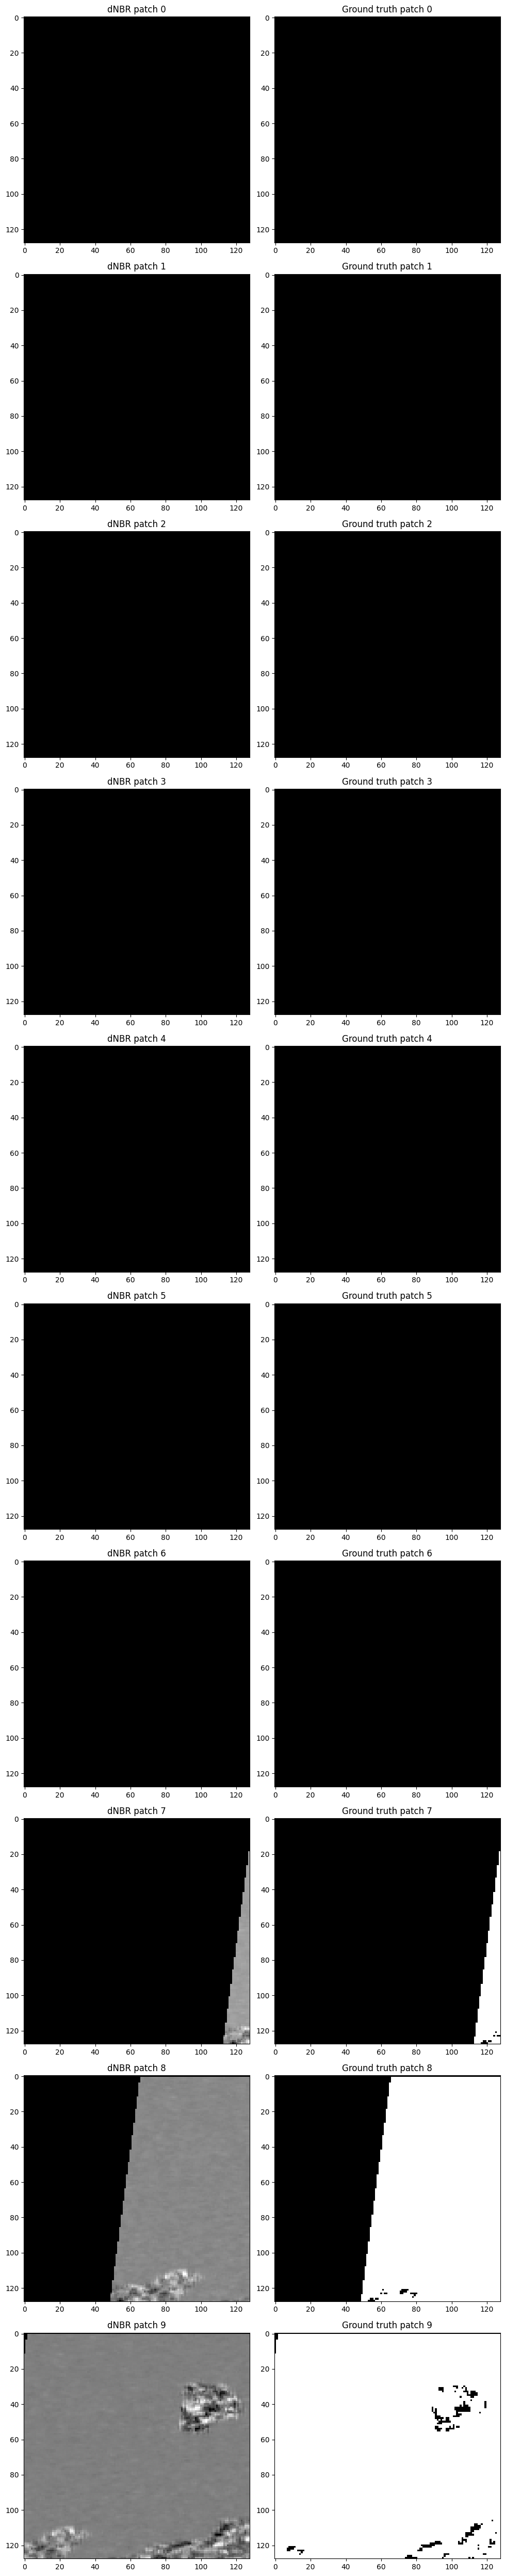

In [ ]:
import matplotlib.pyplot as plt

# patches
dnbr_patches_sample = dnbr_images[:10]
ground_truth_patches_sample = ground_truth_images[:10]

fig, axes = plt.subplots(10, 2, figsize=(10, 50))

for i in range(10):
    # Show dNBR patch
    ax = axes[i, 0]
    ax.imshow(dnbr_patches_sample[i], cmap='gray')
    ax.set_title(f'dNBR patch {i}')

    # Show ground truth patch
    ax = axes[i, 1]
    ax.imshow(ground_truth_patches_sample[i], cmap='gray')
    ax.set_title(f'Ground truth patch {i}')

plt.tight_layout()
plt.show()

Minimum dNBR value: 0
Maximum dNBR value: 255


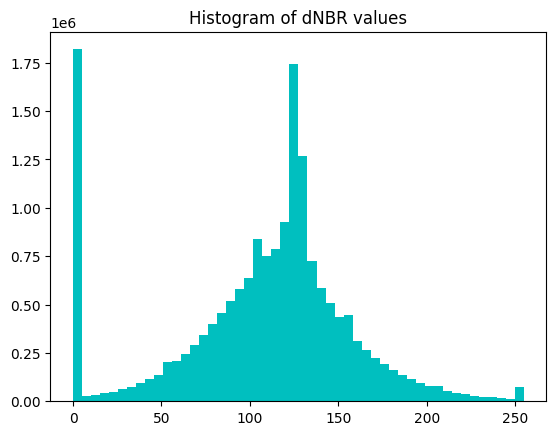

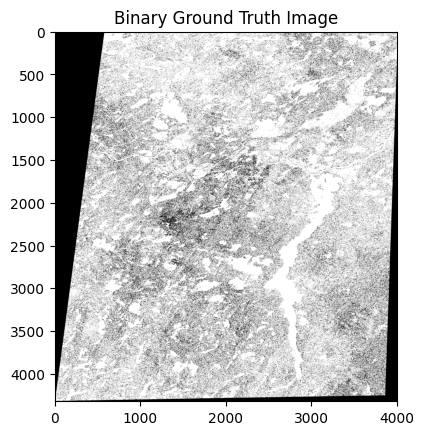

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
threshold = 85

dnbr_image = read_geotiff(file_path)

print("Minimum dNBR value:", np.min(dnbr_image))
print("Maximum dNBR value:", np.max(dnbr_image))

# Histo
plt.hist(dnbr_image.flatten(), bins=50, color='c')
plt.title("Histogram of dNBR values")
plt.show()

binary_ground_truth_image = (dnbr_image > threshold).astype(np.uint8)

# Vis
plt.imshow(binary_ground_truth_image, cmap='gray')
plt.title("Binary Ground Truth Image")
plt.show()

In [ ]:
from ipywidgets import widgets
# Define function to update plots based on threshold value
def update(threshold):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    #dNBR image
    ax = axes[0]
    ax.imshow(dnbr_image, cmap='gray')
    ax.set_title('dNBR Image')

    # ground truth
    binary_ground_truth_image = (dnbr_image > threshold).astype(np.uint8)
    ax = axes[1]
    ax.imshow(binary_ground_truth_image, cmap='gray')
    ax.set_title('Ground Truth Image')

    plt.tight_layout()
    plt.show()

#interactive slider
threshold_slider = widgets.FloatSlider(
    value=threshold,
    min=0,
    max=250,
    step=10,
    description='Threshold:',
    continuous_update=False
)

# Display the widget
widgets.interactive(update, threshold=threshold_slider)

interactive(children=(FloatSlider(value=85.0, continuous_update=False, description='Threshold:', max=250.0, st…

In [ ]:
def print_image_info(image_path):
    dataset = gdal.Open(image_path)
    info = gdal.Info(dataset)
    print(info)

f = "PineGulch"
image1 = f"S2/Resized_S2/TEST/resized_S2_{f}_test.tif"
image2 = f"S1/S1_Resized/resized_S1_{f}.tif"
print_image_info(image1)
print_image_info(image2)

### **CNN**

In [ ]:
from tensorflow.keras.models import load_model

#unet_model = create_unet_model()
loaded_model = load_model('/content/drive/MyDrive/Cleaned_Fire_images_TIFF/unet_model.h5')
unet_model = loaded_model

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Input, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

def create_unet_model(input_shape=(128, 128, 1)):
    inputs = Input(shape=input_shape)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = BatchNormalization()(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(0.25)(p1)

    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = BatchNormalization()(c2)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(0.25)(p2)

    c3 = Conv2D(32, (3, 3), activation='relu', padding='same')(p2)
    c3 = BatchNormalization()(c3)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(0.25)(p3)

    # Bottom
    b = Conv2D(16, (3, 3), activation='relu', padding='same')(p3)
    b = BatchNormalization()(b)

    # Decoder
    u2 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(b)
    u2 = concatenate([u2, c3])
    u2 = Dropout(0.25)(u2)
    d2 = Conv2D(32, (3, 3), activation='relu', padding='same')(u2)
    d2 = BatchNormalization()(d2)

    u3 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(d2)
    u3 = concatenate([u3, c2])
    u3 = Dropout(0.25)(u3)
    d3 = Conv2D(64, (3, 3), activation='relu', padding='same')(u3)
    d3 = BatchNormalization()(d3)

    u4 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(d3)
    u4 = concatenate([u4, c1])
    u4 = Dropout(0.25)(u4)
    d4 = Conv2D(64, (3, 3), activation='relu', padding='same')(u4)
    d4 = BatchNormalization()(d4)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(d4)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(), loss=BinaryCrossentropy(from_logits=False), metrics=['binary_accuracy'])
    return model

unet_model = create_unet_model()

# Train the model
X_train, X_test, y_train, y_test = train_test_split(dnbr_images, ground_truth_images, test_size=0.2, random_state=42)

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

batch_size = 32
epochs = 3
model_cnn = unet_model.fit(X_train, y_train, batch_size, epochs, validation_data=(X_test, y_test))



Epoch 1/3
81/81 [==============================] - 37s 216ms/step - loss: 0.0854 - binary_accuracy: 0.9618 - val_loss: 1.3070 - val_binary_accuracy: 0.8098
Epoch 2/3
81/81 [==============================] - 14s 172ms/step - loss: 0.0599 - binary_accuracy: 0.9760 - val_loss: 0.1712 - val_binary_accuracy: 0.9383
Epoch 3/3
81/81 [==============================] - 14s 173ms/step - loss: 0.0477 - binary_accuracy: 0.9797 - val_loss: 0.0418 - val_binary_accuracy: 0.9785


In [ ]:
# saving and loading the model
from tensorflow.keras.models import load_model

unet_model.save('/content/drive/MyDrive/Cleaned_Fire_images_TIFF/unet_model.h5')
loaded_model = load_model('/content/drive/MyDrive/Cleaned_Fire_images_TIFF/unet_model.h5')


In [ ]:
unet_model.summary()
#tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(model_cnn.history).plot(
    figsize=(8, 5), xlim=[0, 4], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
#save_fig("keras_learning_curves_plot")  # extra code
plt.show()


NameError: ignored

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(unet_model, to_file='unet_model.png', show_shapes=True, show_layer_names=True)

### **ReCONSTRUCT IMAGES**

In [ ]:
def reconstruct_image_from_patches(patches, original_shape, patch_size, overlap_factor=2):
    height, width = original_shape
    reconstructed_image = np.zeros(original_shape)
    patch_count = np.zeros(original_shape)
    stride = patch_size // overlap_factor
    patch_idx = 0

    for i in range(0, height - patch_size + 1, stride):
        for j in range(0, width - patch_size + 1, stride):
            reconstructed_image[i:i+patch_size, j:j+patch_size] += patches[patch_idx]
            patch_count[i:i+patch_size, j:j+patch_size] += 1
            patch_idx += 1

    reconstructed_image /= patch_count
    return reconstructed_image

In [ ]:

dnbr_images_expanded = dnbr_images[..., np.newaxis]
predictions = unet_model.predict(dnbr_images_expanded)

#Reconstruct the image from the patches
predictions = predictions[..., 0]
reconstructed_image = reconstruct_image_from_patches(predictions, dnbr_image.shape, patch_size, overlap_factor=2)


102/102 [==============================] - 4s 34ms/step


<ipython-input-91-699bb1b7c609>:14: RuntimeWarning: invalid value encountered in true_divide
  reconstructed_image /= patch_count


In [ ]:
from PIL import Image
from skimage import exposure

def save_image_as_jpeg(image_array, output_path):
    image_array = image_array * 500
    image_uint8 = Image.fromarray(image_array.clip(0, 255).astype(np.uint8))
    image_uint8.save(output_path)

output_tif_path = 'reconstructed_image_test.tif'
output_jpeg_path = 'testUNET_7.jpeg'

#save_image_as_tif(reconstructed_image, output_tif_path, f'S1/BOX/S1_dNBR_{selected_images[0]}_box.tif')
#save_image_as_jpeg(reconstructed_image, output_jpeg_path)

### **RUNNING CNN**

In [ ]:
# Read and preprocess the new image
fire_name = 'CANADA4'
#new_image_path = f'S1/BOX/S1_dNBR_{fire_name}_box.tif'
new_image_path = f'S1/BOX/S1_sub_{fire_name}_box.tif'#
#new_image_path = f'S1/S1_Resized/resized_S1_{fire_name}.tif'
#new_image_path = f"S2/Resized_S2/TEST/resized_S2_{fire_name}_test.tif"
#new_image_path = f"S2/S2_dNBR_{fire_name}.tif"

new_image = read_geotiff(new_image_path)
preprocessed_new_image = preprocess_image(new_image)

patch_size = 128
new_image_patches = split_image_into_patches(preprocessed_new_image, patch_size, overlap_factor=2)


new_image_patches_expanded = new_image_patches[..., np.newaxis]
new_image_predictions = unet_model.predict(new_image_patches_expanded)
new_image_predictions = new_image_predictions[..., 0]


reconstructed_new_image = reconstruct_image_from_patches(new_image_predictions, new_image.shape, patch_size, overlap_factor=2)


output_tif_path = 'reconstructed_new_image_test2_GC.tif'
output_jpeg_path = f'S1_128_test_{fire_name}_UNET_2.jpeg'

#save_image_as_tif(reconstructed_new_image, output_tif_path, new_image_path)
save_image_as_jpeg(reconstructed_new_image, output_jpeg_path)

629/629 [==============================] - 4s 6ms/step


<ipython-input-20-699bb1b7c609>:14: RuntimeWarning: invalid value encountered in true_divide
  reconstructed_image /= patch_count


In [ ]:
save_image_as_jpeg(reconstructed_new_image, output_jpeg_path)

### **EVALUATIONS**

In [ ]:
import pandas as pd
import cv2
from sklearn.metrics import precision_recall_fscore_support

def evaluate_image(true_image, predicted_image , threshold = 0.05):
    true_image_flattened = true_image.flatten().astype(np.float32)
    predicted_image_flattened = (predicted_image.flatten() > threshold).astype(np.float32)

    loss = BinaryCrossentropy()(true_image_flattened, predicted_image_flattened).numpy()
    accuracy = np.mean((true_image_flattened == predicted_image_flattened).astype(int))
    precision, recall, f1_score, _ = precision_recall_fscore_support(true_image_flattened, predicted_image_flattened, average='binary')

    return loss, accuracy, precision, recall, f1_score

threshold = 0.05
# Evaluate both images
fire_name_eval1 = "CherryCanyon"
fire_name_eval2 = "GrizzlyCreek"

dnbr_image1 = read_geotiff(f'S1/BOX/S1_dNBR_{fire_name_eval1}_box.tif')
dnbr_image2 = read_geotiff(f'S1/BOX/S1_dNBR_{fire_name_eval2}_box.tif')

ground_truth_image1 = (dnbr_image1 > threshold).astype(np.uint8)
ground_truth_image2 = (dnbr_image2 > threshold).astype(np.uint8)

predicted_image1 = cv2.imread(f'CNN_predictions/S1_repatched/S1_128_test_{fire_name_eval1}_UNET.jpeg', cv2.IMREAD_GRAYSCALE)
predicted_image2 = cv2.imread(f'CNN_predictions/S1_repatched/S1_128_2train_{fire_name_eval2}_test.jpeg', cv2.IMREAD_GRAYSCALE)

loss1, accuracy1, precision1, recall1, f1_score1 = evaluate_image(ground_truth_image1, predicted_image1)
loss2, accuracy2, precision2, recall2, f1_score2 = evaluate_image(ground_truth_image2, predicted_image2)

results_table = pd.DataFrame(
    {"Image": [fire_name_eval1, fire_name_eval2],
     "Loss": [loss1, loss2],
     "Accuracy": [accuracy1, accuracy2],
     "Precision": [precision1, precision2],
     "Recall": [recall1, recall2],
     "F1 Score": [f1_score1, f1_score2]}
)


print(results_table)

In [ ]:
def majority_class_accuracy(true_image):
    unique_elements, counts = np.unique(true_image, return_counts=True)
    majority_class_count = np.max(counts)
    return majority_class_count / np.sum(counts)

majority_class_accuracy1 = majority_class_accuracy(ground_truth_image1)
majority_class_accuracy2 = majority_class_accuracy(ground_truth_image2)

results_table["Majority Class Accuracy"] = [majority_class_accuracy1, majority_class_accuracy2]

print(results_table)


          Image      Loss  Accuracy  Precision    Recall  F1 Score  \
0  CherryCanyon  1.858866  0.879482   0.998569  0.877867  0.934336   
1  GrizzlyCreek  1.629695  0.894333   0.996982  0.884082  0.937144   

   Majority Class Accuracy  
0                 0.976714  
1                 0.891001  


### **OTHER**

Resampling
other: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/smart_resize


In [ ]:
gdal.Info(f"/content/drive/MyDrive/Cleaned_Fire_images_TIFF/S1/BOX/S1_dNBR_{fire}_box.tif")

'Driver: GTiff/GeoTIFF\nFiles: /content/drive/MyDrive/Cleaned_Fire_images_TIFF/S1/BOX/S1_dNBR_PineGulch_box.tif\nSize is 5426, 2600\nCoordinate System is:\nGEOGCRS["WGS 84",\n    DATUM["World Geodetic System 1984",\n        ELLIPSOID["WGS 84",6378137,298.257223563,\n            LENGTHUNIT["metre",1]]],\n    PRIMEM["Greenwich",0,\n        ANGLEUNIT["degree",0.0174532925199433]],\n    CS[ellipsoidal,2],\n        AXIS["geodetic latitude (Lat)",north,\n            ORDER[1],\n            ANGLEUNIT["degree",0.0174532925199433]],\n        AXIS["geodetic longitude (Lon)",east,\n            ORDER[2],\n            ANGLEUNIT["degree",0.0174532925199433]],\n    ID["EPSG",4326]]\nData axis to CRS axis mapping: 2,1\nOrigin = (-108.779962194470457,39.526501321957831)\nPixel Size = (0.000089831528412,-0.000089831528412)\nMetadata:\n  AREA_OR_POINT=Area\nImage Structure Metadata:\n  COMPRESSION=LZW\n  INTERLEAVE=PIXEL\nCorner Coordinates:\nUpper Left  (-108.7799622,  39.5265013) (108d46\'47.86"W, 39d31

In [ ]:
gdal.Info(f"/content/drive/MyDrive/Cleaned_Fire_images_TIFF/S2/resized_S2_{fire}.tif")

'Driver: GTiff/GeoTIFF\nFiles: /content/drive/MyDrive/Cleaned_Fire_images_TIFF/S2/resized_S2_PineGulch.tif\nSize is 5426, 2600\nCoordinate System is:\nGEOGCRS["WGS 84",\n    DATUM["World Geodetic System 1984",\n        ELLIPSOID["WGS 84",6378137,298.257223563,\n            LENGTHUNIT["metre",1]]],\n    PRIMEM["Greenwich",0,\n        ANGLEUNIT["degree",0.0174532925199433]],\n    CS[ellipsoidal,2],\n        AXIS["geodetic latitude (Lat)",north,\n            ORDER[1],\n            ANGLEUNIT["degree",0.0174532925199433]],\n        AXIS["geodetic longitude (Lon)",east,\n            ORDER[2],\n            ANGLEUNIT["degree",0.0174532925199433]],\n    ID["EPSG",4326]]\nData axis to CRS axis mapping: 2,1\nOrigin = (-108.779962194470457,39.526501321957831)\nPixel Size = (0.000089831528412,-0.000089831528412)\nMetadata:\n  AREA_OR_POINT=Area\nImage Structure Metadata:\n  INTERLEAVE=BAND\nCorner Coordinates:\nUpper Left  (-108.7799622,  39.5265013) (108d46\'47.86"W, 39d31\'35.40"N)\nLower Left  (

In [ ]:
def write_geotiff(output_file, data, input_dataset):
    driver = gdal.GetDriverByName('GTiff')
    out_rows, out_columns = data.shape
    out_bands = 1

    out_data = driver.Create(output_file, out_columns, out_rows, out_bands, gdal.GDT_Byte)
    out_data.SetGeoTransform(input_dataset.GetGeoTransform())
    out_data.SetProjection(input_dataset.GetProjection())

    out_band = out_data.GetRasterBand(1)
    out_band.WriteArray(data)
    out_band.SetNoDataValue(0)
    out_band.FlushCache()

# Open the input GeoTIFF dataset
input_dataset = gdal.Open(input_tif, gdal.GA_ReadOnly)

# Save the output as a GeoTIFF
write_geotiff('output_classification.tif', output_data, input_dataset)

Stack the 2D images (Landsat composite and NLCD impervious surface) to create a single image from which samples can be taken.  Convert the image into an array image in which each pixel stores 256x256 patches of pixels for each band.  This is a key step that bears emphasis: to export training patches, convert a multi-band image to [an array image](https://developers.google.com/earth-engine/arrays_array_images#array-images) using [`neighborhoodToArray()`](https://developers.google.com/earth-engine/api_docs#eeimageneighborhoodtoarray), then sample the image at points.

Use some pre-made geometries to sample the stack in strategic locations. Specifically, these are hand-made polygons in which to take the 256x256 samples. Display the sampling polygons on a map, red for training polygons, blue for evaluation. Shows which fires are being used for traiing and which ones are test.
